In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

save_path = "E:/ED_MS/Semester_3/Codes/MyProject/saved_figures"

sns.set_theme(style="whitegrid")

## 4.2 Model Size

In [2]:
"""

U-Net: 118.37231826782227 MiB, 31030593 fp32 parameters

Lightweight U-Net: 15.005619049072266 MiB, 3933633 fp32 parameters

BLU-Net 1.4311981201171875 MiB, 11780352 binary parameters, 7044 fp32 parameters
"""

ms_dict = dict(name=["Vanilla U-Net", "Lightweight U-Net", "BLU-Net"],
               fp_cnt=[31030593, 3933633, 7044],
               bool_cnt=[0, 0, 11780352])
model_size_df = pd.DataFrame(ms_dict)
model_size_df.loc[:, "fp_size"] = model_size_df.loc[:, "fp_cnt"] * 32.0 / 8.0
model_size_df.loc[:, "bool_size"] = model_size_df.loc[:, "bool_cnt"] * 1 / 8.0
model_size_df.loc[:, "total_size_MiB"] = (model_size_df.loc[:, "fp_size"] + model_size_df.loc[:, "bool_size"]) / (
            2 ** 20)

model_size_df

,name,fp_cnt,bool_cnt,fp_size,bool_size,total_size_MiB
0,Vanilla U-Net,31030593,0,124122372.0,0.0,118.372318
1,Lightweight U-Net,3933633,0,15734532.0,0.0,15.005619
2,BLU-Net,7044,11780352,28176.0,1472544.0,1.431198


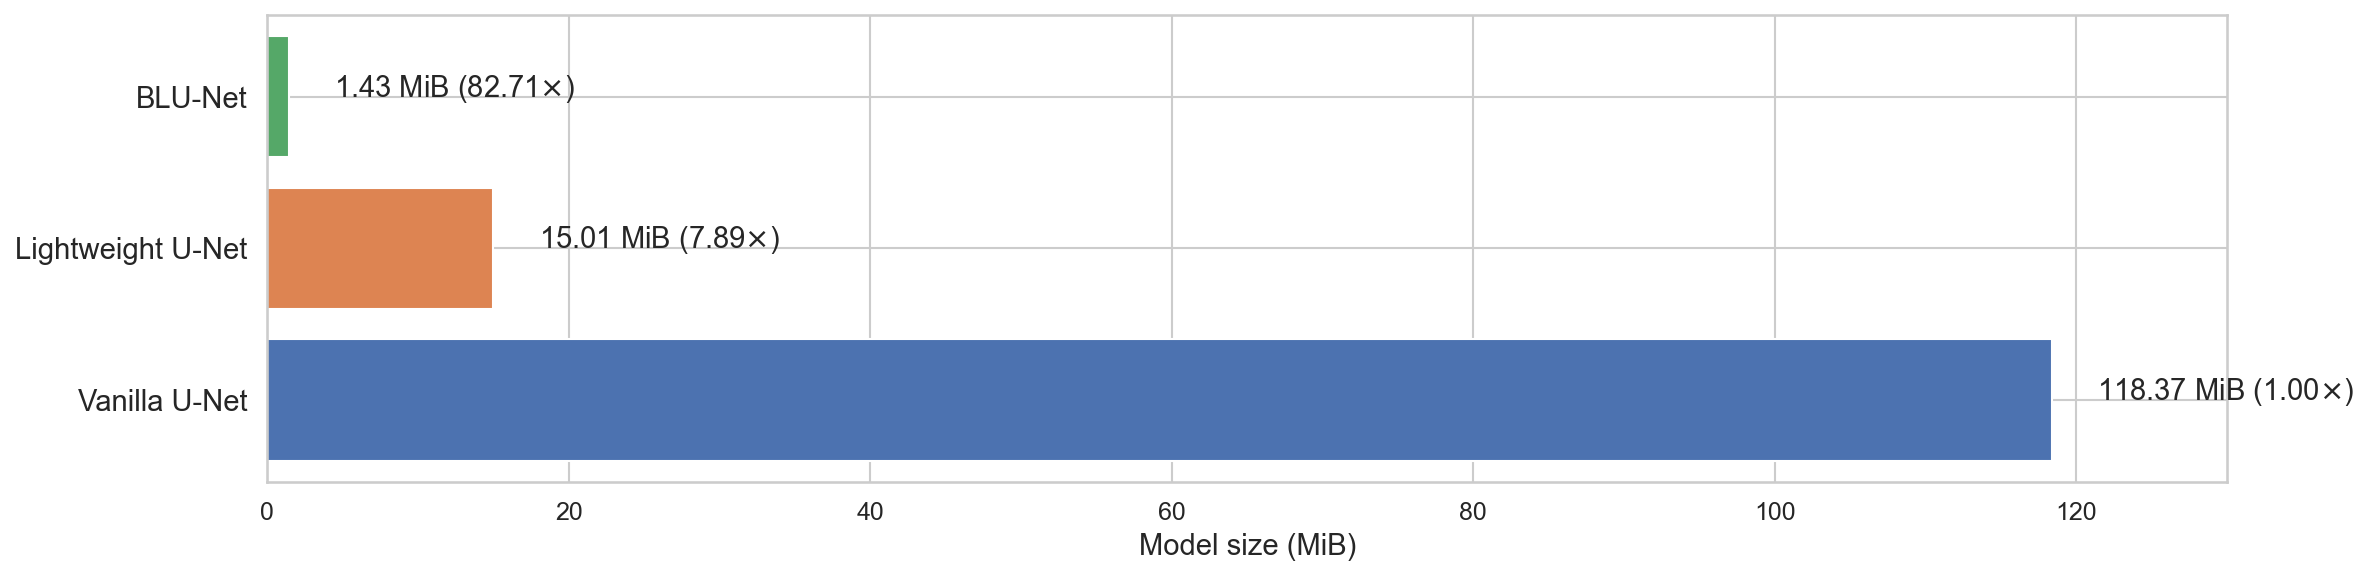

In [3]:
f, ax = plt.subplots(figsize=(16, 4), dpi=150)
y_ticks = [0.5, 1, 1.5]
baseline_size = model_size_df.iloc[0, :].loc["total_size_MiB"]
for index, row in model_size_df.iterrows():
    ax.barh(y_ticks[index], row["total_size_MiB"], 0.4)
    info = "{:.2f} MiB ({:.2f}$\\times$)".format(row["total_size_MiB"], baseline_size / row["total_size_MiB"])
    ax.text(row["total_size_MiB"] + 3, y_ticks[index], info, fontsize=14)
plt.yticks(y_ticks, model_size_df.loc[:, "name"], fontsize=14)
plt.xticks(fontsize=12)
plt.xlabel("Model size (MiB)", fontsize=14)
plt.xlim([0, 130])
f.tight_layout()
f.savefig(os.path.join(save_path, "model size cmp.jpg"))

## 4.2 Inference Latency

inference latency of vanilla unet = 0.0615 s, 16.26 FPS,
vanilla unet computation throughput = 216.941212 M FLOPs
inference latency of lw_unet = 0.0259 s, 38.62 FPS
lw_unet computation throughput = 433.882424 M FLOP

In [4]:
inference_dict = dict(name=["Vanilla U-Net", "Lightweight U-Net", "Int8 BLU-Net\n (estimated)"],
                      fps=[16.26, 38.62, 38.62 * 3])
inference_df = pd.DataFrame(inference_dict)
inference_df

,name,fps
0,Vanilla U-Net,16.26
1,Lightweight U-Net,38.62
2,Int8 BLU-Net\n (estimated),115.86


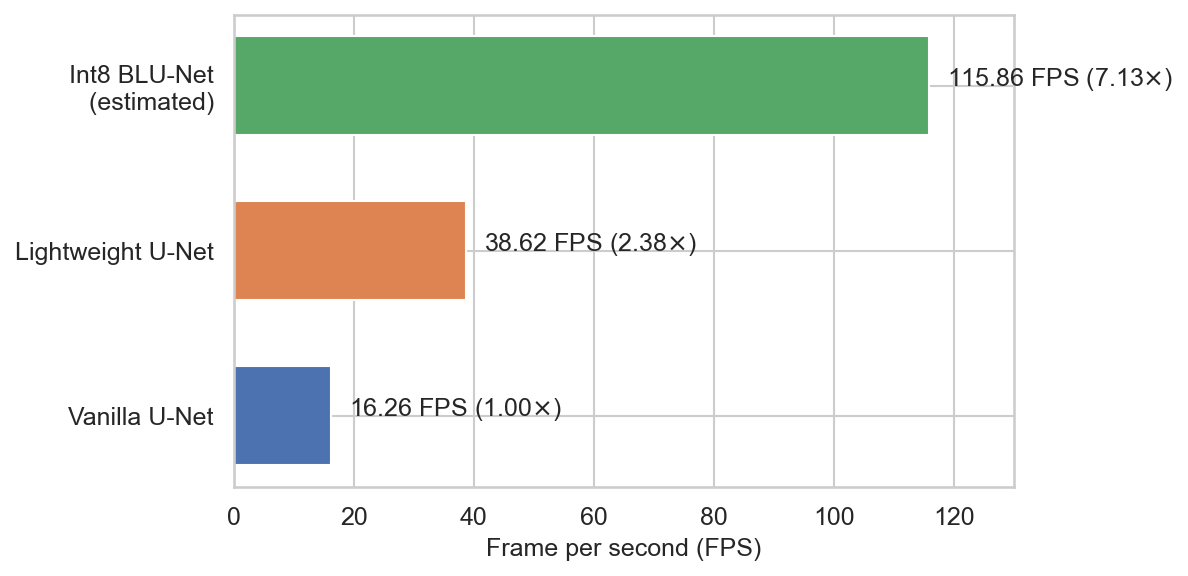

In [5]:
f, ax = plt.subplots(figsize=(8, 4), dpi=150)
y_ticks = [0.5, 1, 1.5]
baseline_fps = inference_df.iloc[0, :].loc["fps"]
for index, row in inference_df.iterrows():
    ax.barh(y_ticks[index], row["fps"], 0.3)
    info = "{:.2f} FPS ({:.2f}$\\times$)".format(row["fps"], row["fps"]/baseline_fps)
    ax.text(row["fps"] + 3, y_ticks[index], info, fontsize=12)
plt.yticks(y_ticks, inference_df.loc[:, "name"], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Frame per second (FPS)", fontsize=12)
plt.xlim([0, 130])
f.tight_layout()
f.savefig(os.path.join(save_path, "model fps cmp.jpg"))

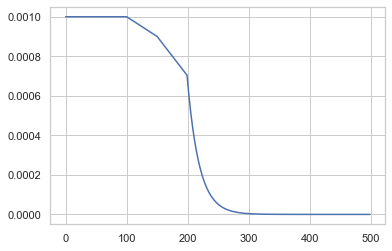

In [30]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

x = [0, 100, 150, 200]
y = [1e-3, 1e-3, 0.9e-3, 0.7e-3]

from training_utils import get_lr_scheduler_v2

lr = 1e-3
lr_list = []
epochs = np.arange(0, 500)

scheduler_v2 = get_lr_scheduler_v2(x, y)

for epoch in epochs:
    lr = scheduler_v2(epoch, lr)
    lr_list.append(lr)

f, ax = plt.subplots()
ax.plot(epochs, lr_list)